# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [2]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [3]:
display(df_taxi[:3])
display(df_taxi.dtypes)
display(df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

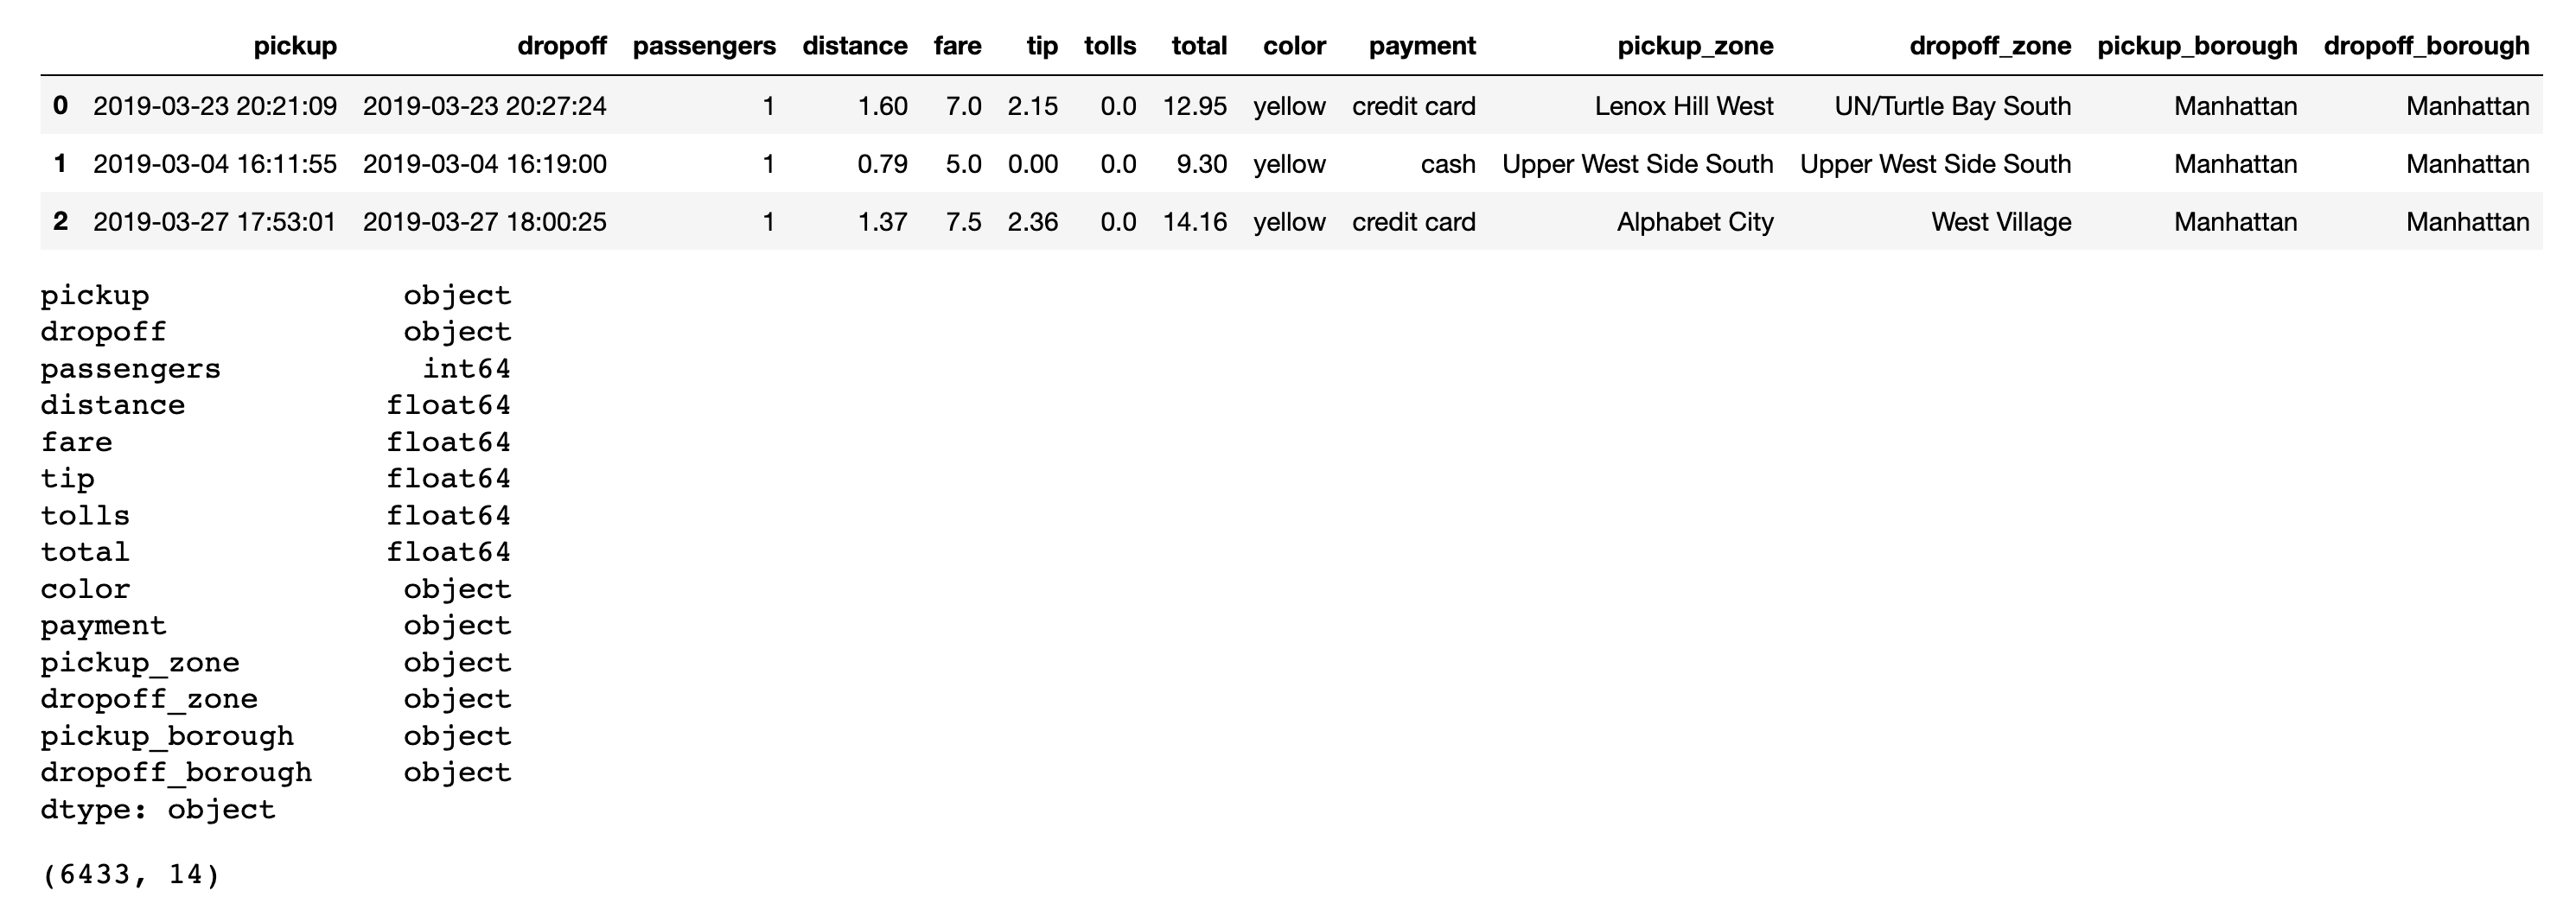

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [4]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [5]:
# Колонка, яка має найбільше пропущених значень
column_max_na = df_taxi.isna().sum().idxmax()
column_max_na

'dropoff_zone'

In [6]:
# Рядки, де колонка, яка має найбільше пропущених значень, має пропущені значення
df_taxi[df_taxi[column_max_na].isna()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


В описі датасету на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) зазначено:  
Дані, що використовуються у доданих наборах даних, були зібрані та надані Комісії з питань таксі та лімузинів Нью-Йорка (TLC) постачальниками технологій, уповноваженими відповідно до Програм покращення пасажирських перевезень Taxicab & Livery (TPEP/LPEP). Дані про поїздку не були створені TLC, і TLC не робить жодних заяв щодо точності цих даних.  
Відсутні дані в кількох колонках можуть бути результатом неповної або некоректної інформації, яку надають постачальники даних. Можливо, що система, яка збирає дані, не завжди успішно отримує цю інформацію, через це маємо пропущенні значення.  
Наявність рядків з distance==0, а total!=0, дозволяє зробити припущення, що на певних поїздках відстань була вказана як нульова, але була зазначена сумарна плата за поїздку.  
Можливі причини того, що distance==0: помилка вводу даних, або технічні проблеми при вимірюванні відстані.  
Сумарна плата за поїздку у випадках, коли distance==0, могла бути розрахована на основі інших параметрів:  
- `fare` - базова плата за поїздку   
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги


In [7]:
# час поїздки, коли distance==0
time_trip = df_taxi[df_taxi.distance==0].dropoff - df_taxi[df_taxi.distance==0].pickup
time_trip = pd.Series(time_trip, name='time_trip')

# подивимось час поїздки у рядках, коли distance==0
pd.concat([df_taxi[['pickup', 'dropoff', 'total']][df_taxi.distance==0], time_trip], axis=1)

,pickup,dropoff,total,time_trip
42,2019-03-30 23:59:14,2019-03-30 23:59:17,100.38,0 days 00:00:03
120,2019-03-21 17:21:44,2019-03-21 17:21:49,4.30,0 days 00:00:05
622,2019-03-12 19:52:36,2019-03-12 19:52:55,166.00,0 days 00:00:19
670,2019-03-08 04:50:48,2019-03-08 04:51:07,6.30,0 days 00:00:19
970,2019-03-29 00:02:00,2019-03-29 00:02:05,50.30,0 days 00:00:05
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,3.30,0 days 00:00:08
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,5.80,0 days 00:00:03
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,71.89,0 days 00:01:08
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,72.00,0 days 00:00:00
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,3.31,0 days 00:00:26


Як бачимо в багатьох випадках, коли distance==0, а total!=0, час поїздки складав або 0 секунд, або декілька секунд. Що також може свідчити про технічні проблеми з фіксацією часу поїздки, або якісь збої в системі, що збирає дані про час, відстань та інші параметри поїздки.

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [8]:
df_taxi_clean = df_taxi.fillna('NA')

Після виконання завдання запустіть наступну клітинку:

In [9]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

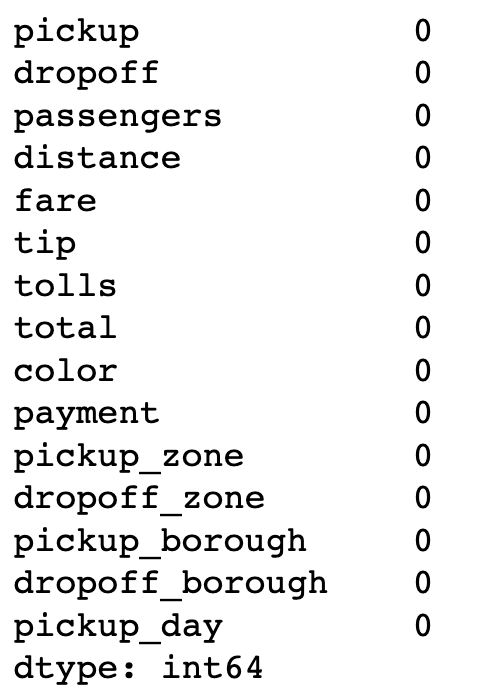

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [10]:
# в моєму випадку данні колонки pickup з самого початку завантажились у форматі datetime64[ns].
# для перетворення даних у формат datetime64[ns] я б виконала наступний код:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])

Після виконання завдання запустіть наступну клітинку:

In [11]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

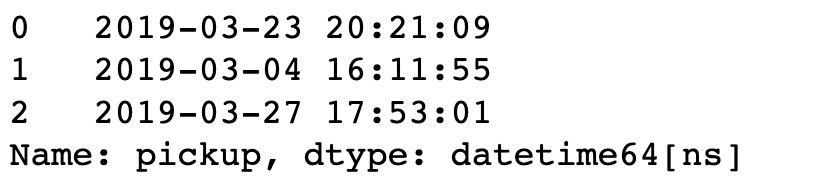

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [12]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

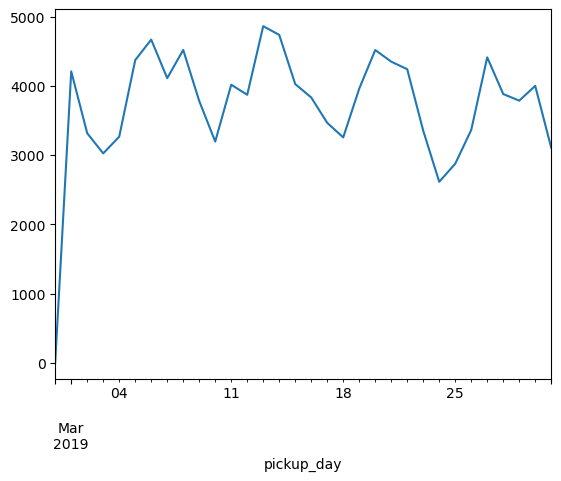

In [13]:
df_taxi_clean.groupby('pickup_day')['total'].sum().plot();

На графіку бачимо, що наш набір даних містить дані про поїздки за березень 2019, та маємо близьке до нуля значення сумарних платежів в перший день.

Очікується графік:

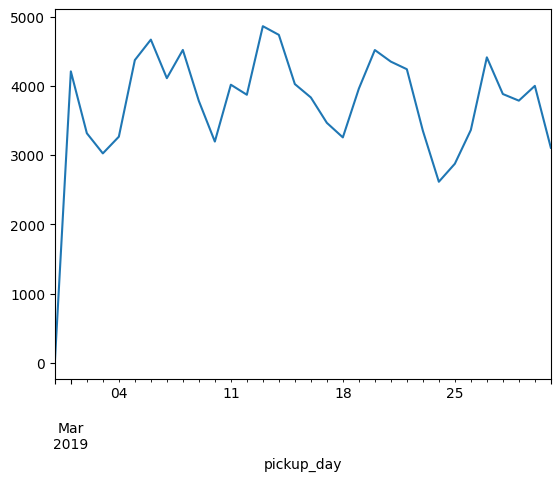

6.Виведіть кількість рядків для кожного pickup_day.

In [14]:
df_taxi_clean.groupby('pickup_day').size()

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

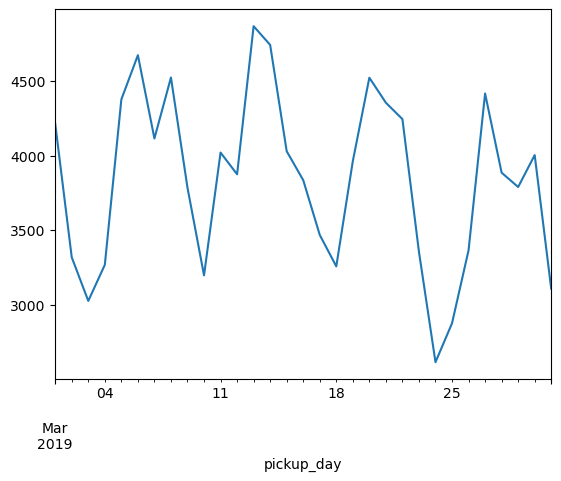

In [15]:
df_taxi_clean = df_taxi_clean.drop(df_taxi_clean[df_taxi_clean['pickup_day'] == '2019-02-28'].index)
# або так
# df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']

df_taxi_clean.groupby('pickup_day')['total'].sum().plot();

Очікуваний графік:

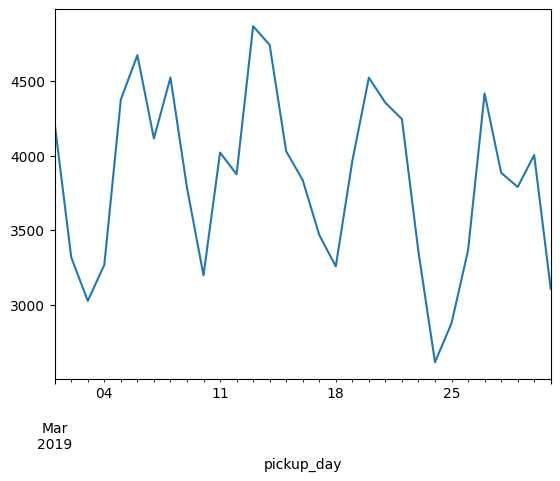

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [16]:
borough_pivot = df_taxi_clean.pivot_table(index='pickup_day', columns='pickup_borough', values='total', aggfunc='sum')
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,NA,Queens
pickup_day,,,,,
2019-03-01,123.42,353.05,3169.47,14.60,553.29
2019-03-02,NaN,146.56,2716.33,NaN,456.13
2019-03-03,80.75,407.06,2100.23,10.55,428.73
2019-03-04,92.00,188.73,2026.17,NaN,962.18
2019-03-05,98.16,558.40,2981.26,NaN,739.56
2019-03-06,130.65,198.53,3501.07,10.00,833.36
2019-03-07,NaN,440.75,3087.82,NaN,587.13
2019-03-08,79.20,237.47,3408.85,18.35,780.34
2019-03-09,80.22,187.88,2967.71,38.26,511.73


In [17]:
# видалимо колонку зі значенням pickup_borough рівним NA
borough_pivot = borough_pivot.drop(columns='NA')
borough_pivot

# або так
# del borough_pivot['NA']

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

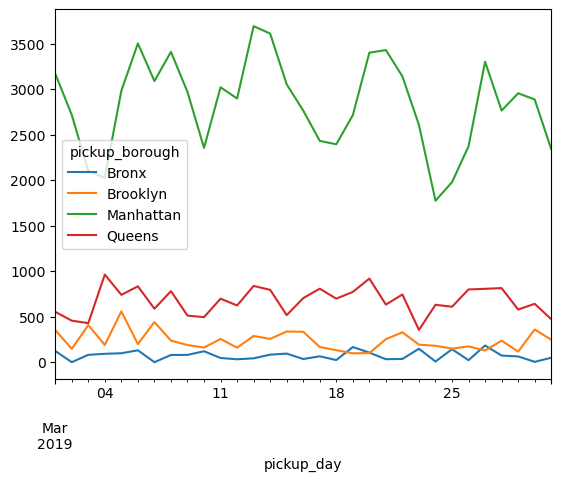

In [18]:
borough_pivot.fillna(0).plot();

 Найчастіше найбільша сума денних платежів за поїздки на таксі в районі Manhattan.

Очікуваний графік :

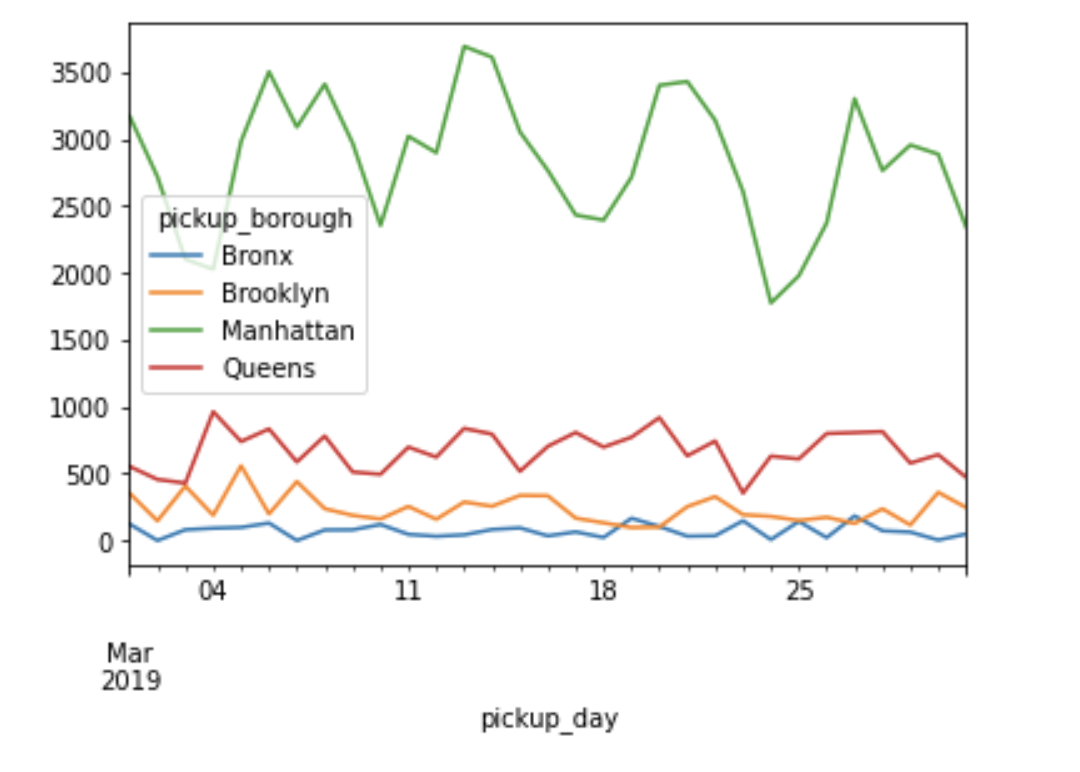

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

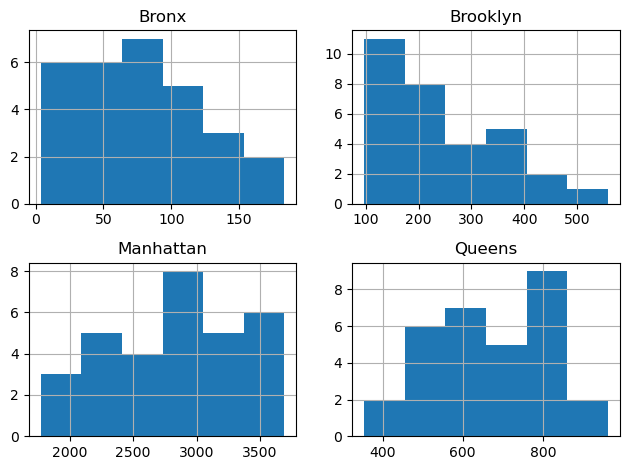

In [19]:
borough_pivot.hist(bins=6);
plt.tight_layout();

Найбільш вдалим для аналізу даних за місяць вважаю використання 6 бінів.  
В даному випадку 6 бінів відповідають середньому значенню в 5 днів на бін. Це забезпечує достатню деталізацію, щоб помітити можливі варіації та особливості в розподілі денних платежів за поїздки.

Приклад одного з правильних виконань завдання:

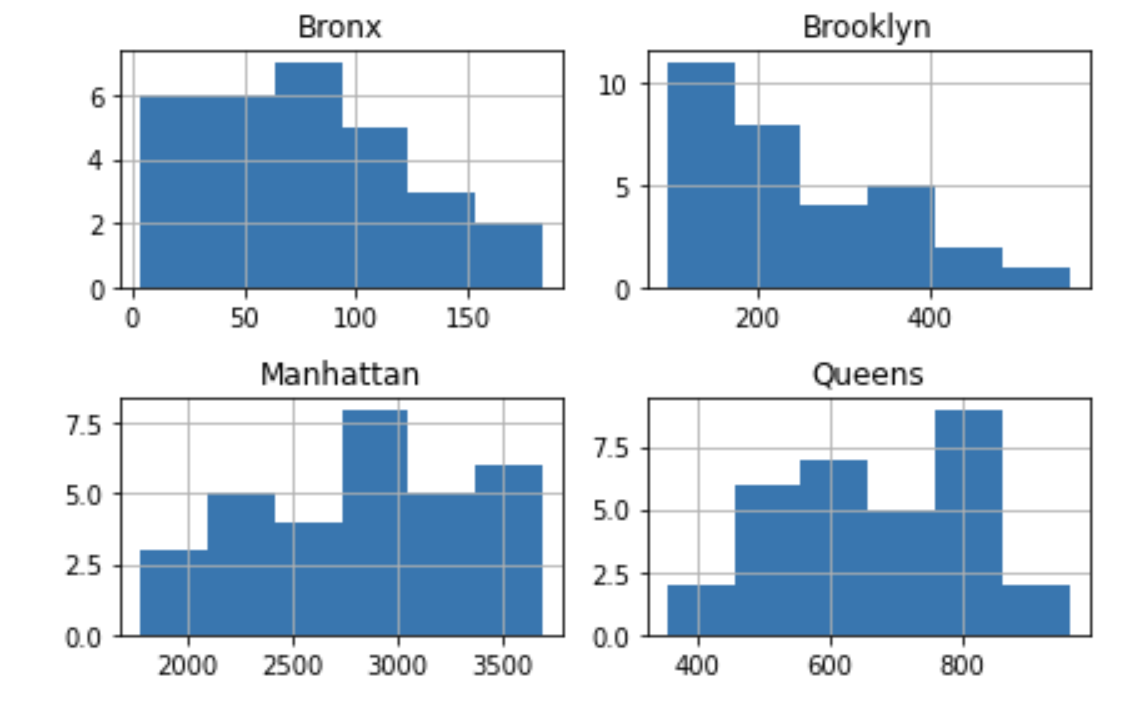

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по районам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

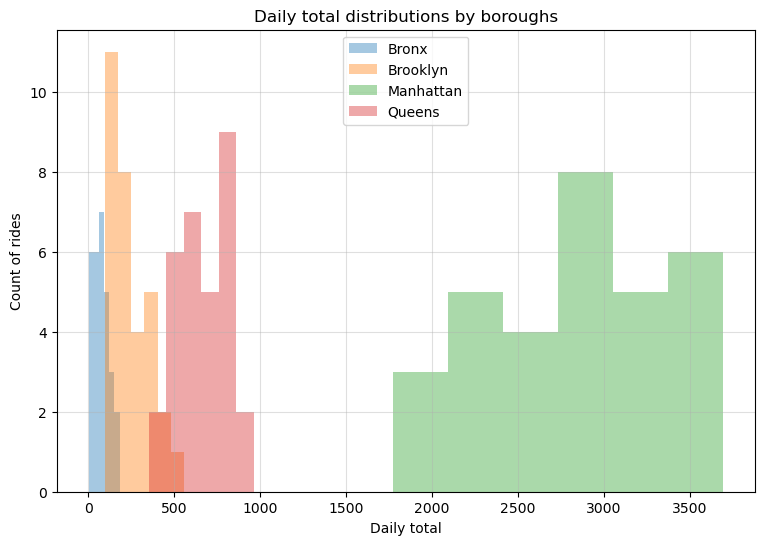

In [20]:
plt.figure(figsize=(9,6))
for col in borough_pivot:
    plt.hist(borough_pivot[col], bins=6, alpha=.4, label=col)  
#     або так
#     borough_pivot[col].plot.hist(bins=6, alpha=.4, label=col)

plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.title('Daily total distributions by boroughs')
plt.legend(loc=9)
plt.grid(axis='both', alpha=.4)
plt.show();

Очікуваний результат:

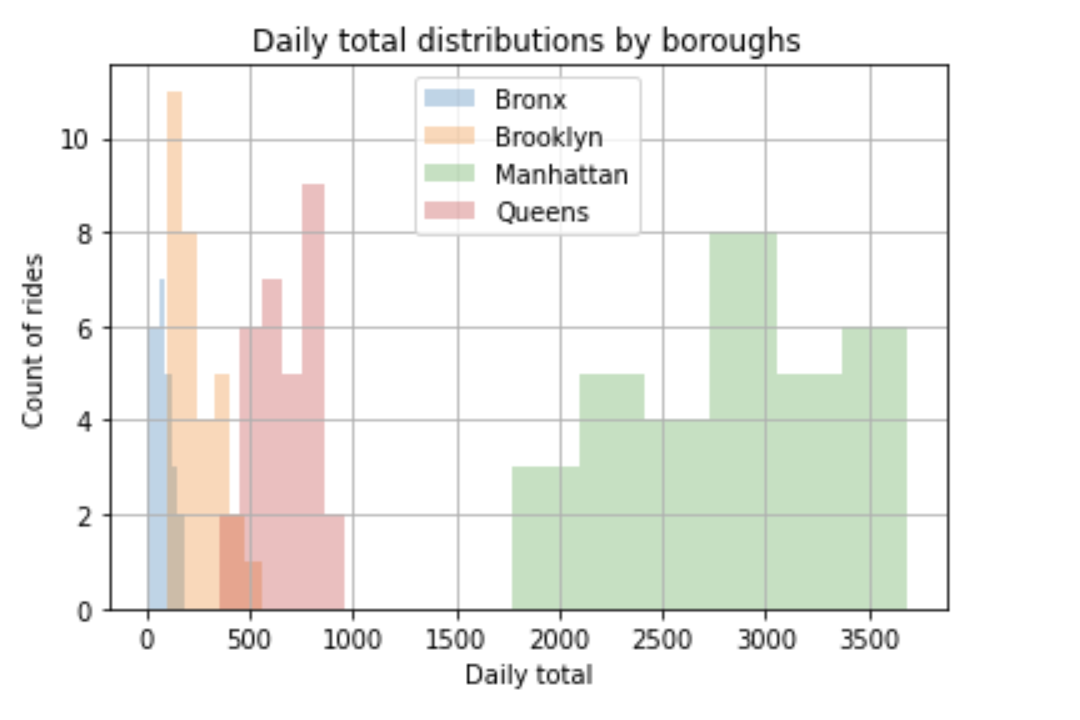

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

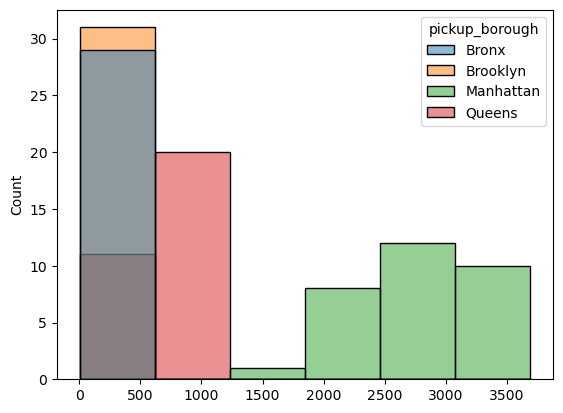

In [21]:
sns.histplot(data=borough_pivot, bins=6);

За допомогою функіоналу seaborn також можемо побудувати 4 гістограми на одній фігурі.

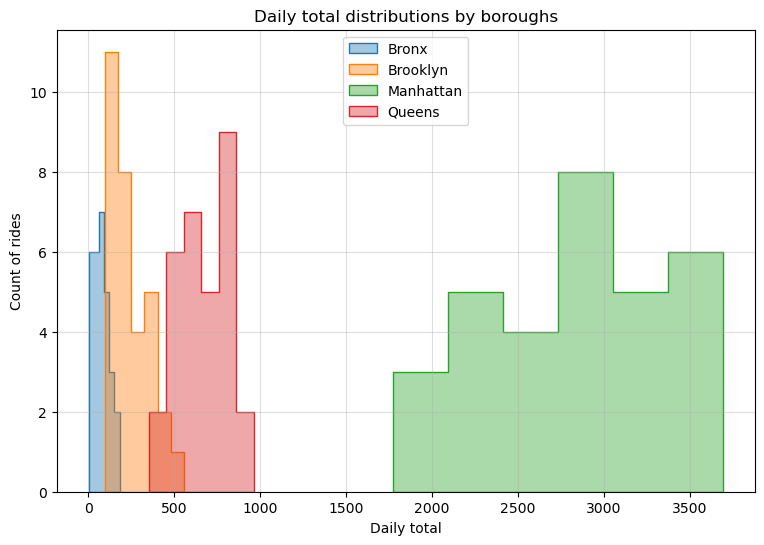

In [22]:
plt.figure(figsize=(9,6))
for col in borough_pivot:
    sns.histplot(borough_pivot[col], bins=6, element='step', alpha=.4, label=col)  
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.title('Daily total distributions by boroughs')
plt.legend(loc=9)
plt.grid(axis='both', alpha=.4)
plt.show();

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

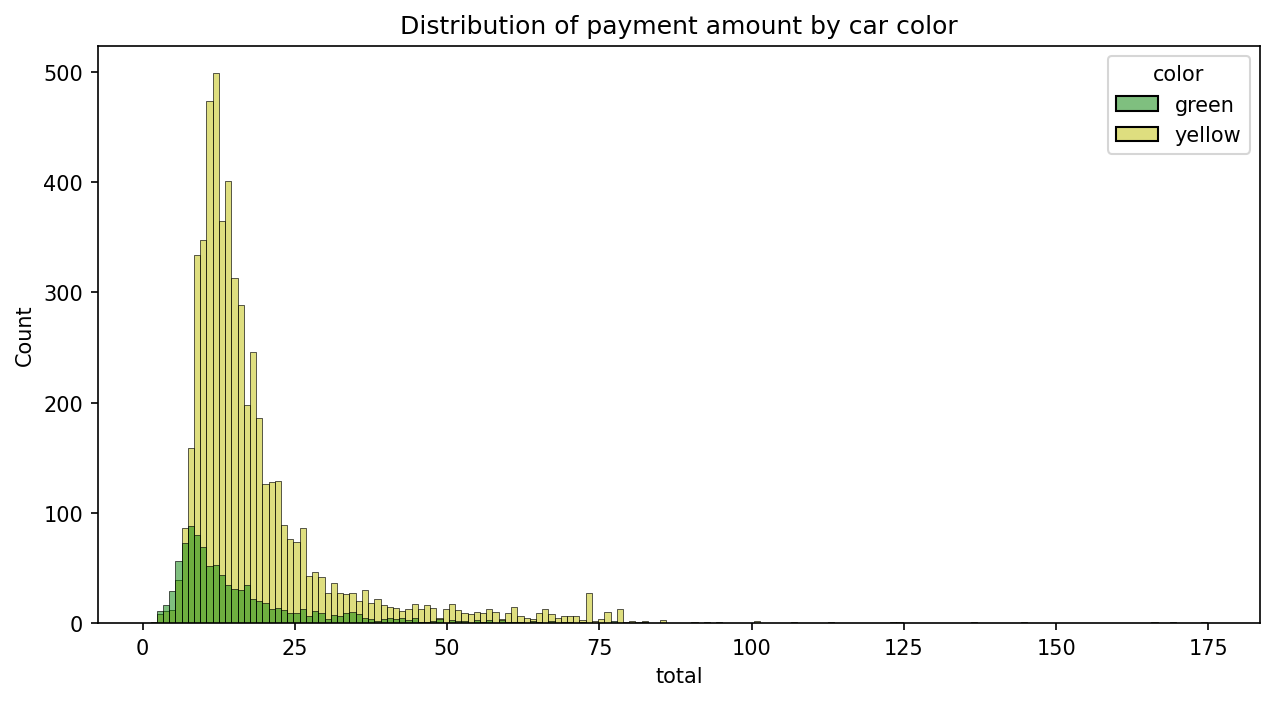

In [23]:
plt.figure(figsize=(10,5), dpi=150)
sns.histplot(data = df_taxi_clean.sort_values('color'), x='total', hue='color', palette=['g', 'y']);
plt.title('Distribution of payment amount by car color');

Очікуваний результат:

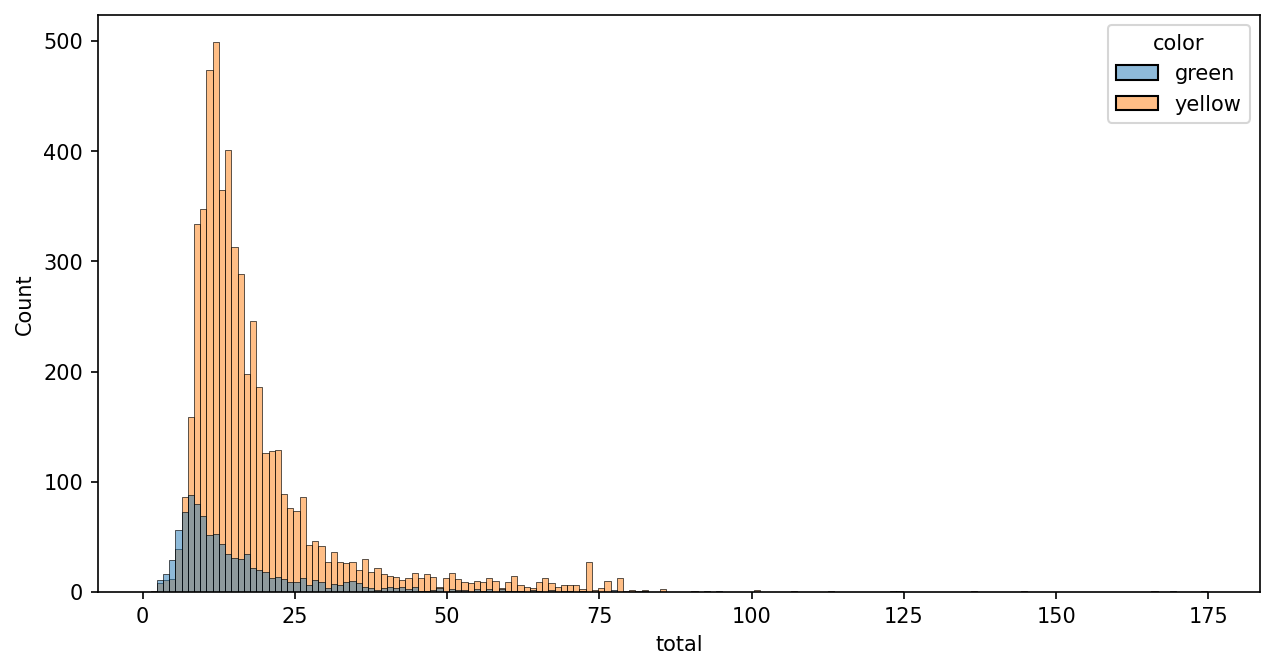

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

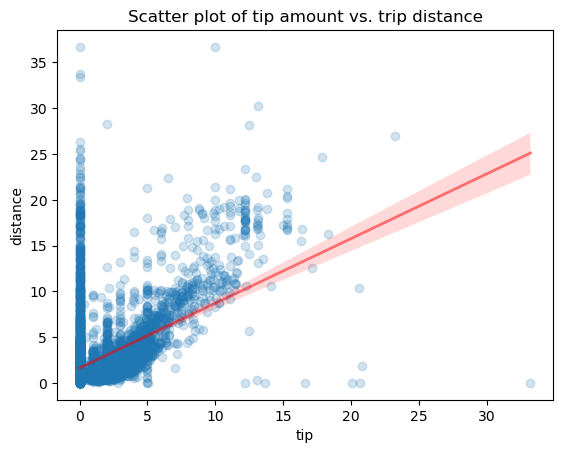

In [24]:
sns.regplot(
    data=df_taxi_clean,
    x='tip', y='distance',
    line_kws={'color':'r', 'alpha':.5, 'lw':2},
    scatter_kws={'alpha':.2}
);
plt.title('Scatter plot of tip amount vs. trip distance');

Один з можливих результатів (побудовано з seaborn):

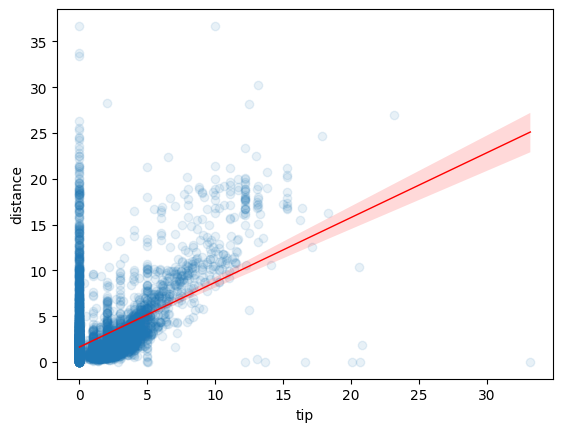

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

Пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки, - це лінія з точок з tip=0.  
Це означає, що для деяких значень дальності поїздок відповідний розмір чайових дорівнює нулю. Тобто в даних випадках клієнт не залишив жодного чайового, або можливий ще такий варіант, що за цими поїздками з якихось причин суми чайових не були внесені в набір даних.

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

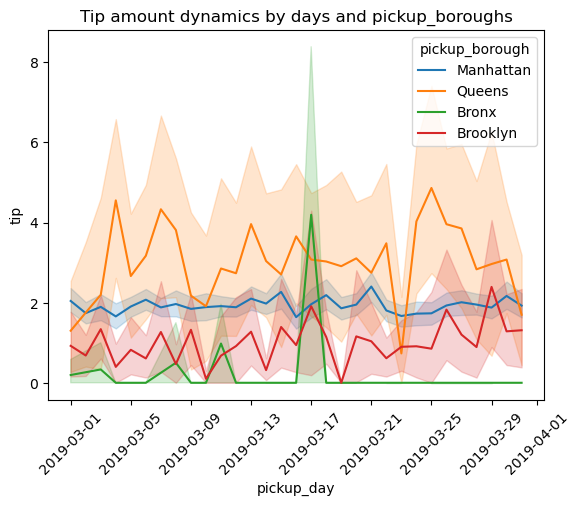

In [25]:
sns.lineplot(data=df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'], x="pickup_day", y="tip", hue="pickup_borough");
plt.xticks(rotation=45);
plt.title("Tip amount dynamics by days and pickup_boroughs");

**Найнижчий середній розмір** чайових при початку поїздки в районі Bronx.  
**Найвищий середній розмір** чайових в поїздках з району Queens.  
Розмір чайових найстабільніший (найменше змінюється з дня у день) при проїздках з району Manhattan.

Один з можливих результатів (побудовано з seaborn):

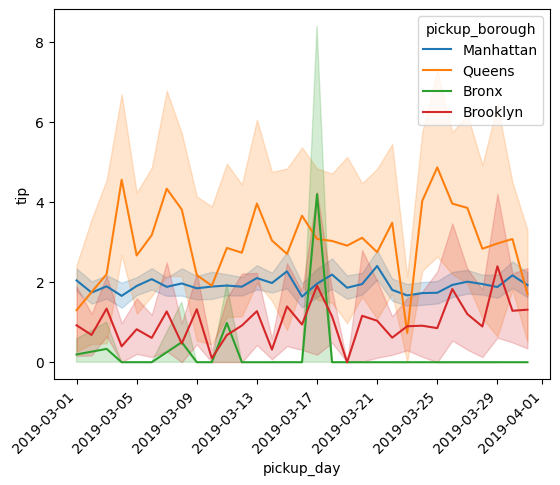

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

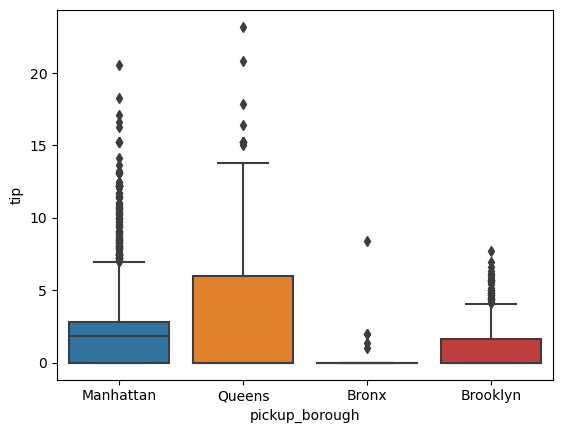

In [26]:
sns.boxplot(data=df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'], x="pickup_borough", y="tip");

Один з можливих результатів (побудовано з seaborn):

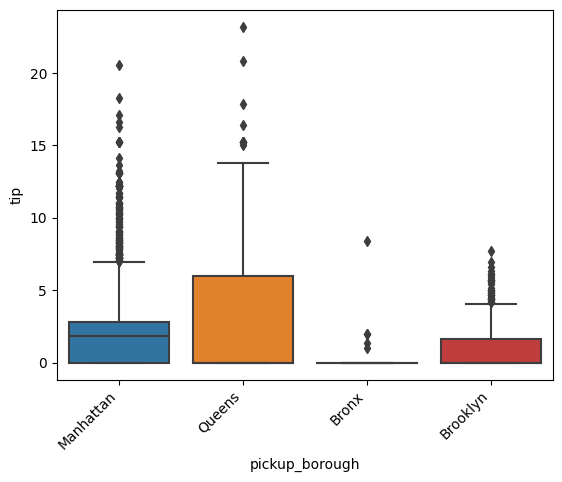

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

15.1.  При початку поїздки в якому районі найчастіше дають чайові, а в якому районі найрідше?


In [27]:
# Додамо в набір даних колонку tip_exists, в якій 1 - були чайові, 0 - не було чайових.
df_taxi_clean['tip_exists'] = df_taxi_clean.tip.apply(lambda x: 1 if x > 0 else 0)

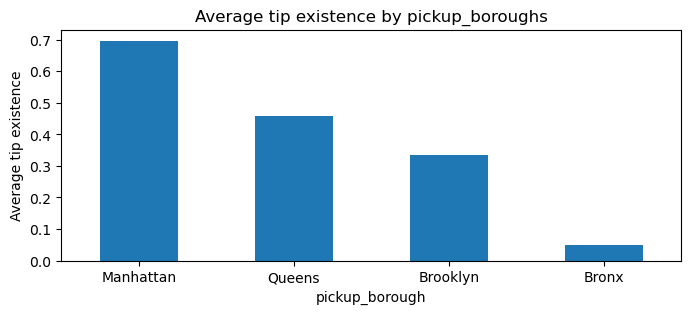

In [28]:
plt.figure(figsize=(8,3))
df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'].groupby('pickup_borough').tip_exists.mean().sort_values(ascending=False).plot.bar();
plt.xticks(rotation=0);
plt.ylabel('Average tip existence')
plt.title('Average tip existence by pickup_boroughs');

Найчастіше дають чайові при початку поіздки в районі Manhattan - майже 70% поїздок.  
Найрідше дають чайові при початку поіздки в районі Bronx - близько 5% поїздок.

15.2. В який час доби найбільше поїздок?

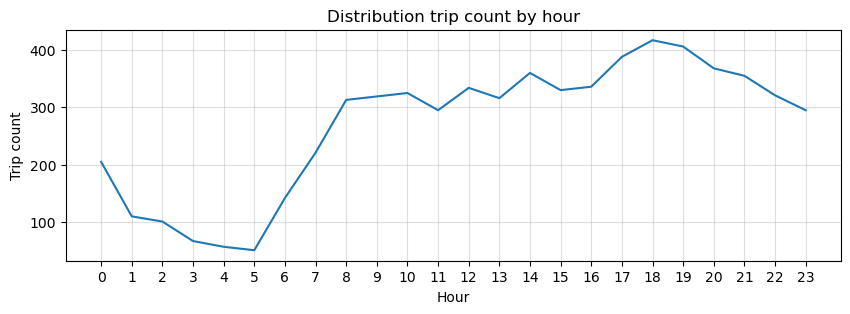

In [29]:
# Отримаємо годину з колонки 'pickup' і створити нову колонку 'pickup_hour'
df_taxi_clean['pickup_hour'] = df_taxi_clean['pickup'].dt.hour

# Кількість поїздок за кожну годину
hourly_trips = df_taxi_clean['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(10,3))
plt.plot(hourly_trips.index, hourly_trips.values)
plt.xlabel('Hour')
plt.ylabel('Trip count')
plt.title('Distribution trip count by hour')
plt.xticks(range(24))
plt.grid(True, alpha=.4)

Найбільша кількіть поїздок спостерігається в період між 17 та 19 годинами.  
Подивимось також розподіл кількості поїздок за годинами доби у розрізі районів, в яких почалась поїздка. 

In [30]:
borough_count_pivot = df_taxi_clean.pivot_table(index=['pickup_hour'], columns=['pickup_borough'], aggfunc='size', fill_value=0)
del borough_count_pivot['NA']
# borough_count_pivot

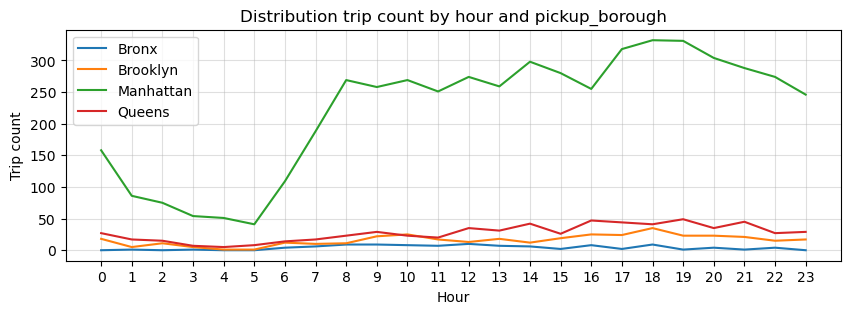

In [31]:
plt.figure(figsize=(10,3));
plt.plot(borough_count_pivot)
plt.xlabel('Hour')
plt.ylabel('Trip count')
plt.title('Distribution trip count by hour and pickup_borough')
plt.xticks(range(24))
plt.legend(borough_count_pivot.columns)
plt.grid(True, alpha=.4)

In [32]:
for col in borough_count_pivot:
    print(f'Найбільше поїздок з району {col} о {borough_count_pivot[col].idxmax()} годині.')

Найбільше поїздок з району Bronx о 12 годині.
Найбільше поїздок з району Brooklyn о 18 годині.
Найбільше поїздок з району Manhattan о 18 годині.
Найбільше поїздок з району Queens о 19 годині.


15.3. Як кількість поїздок розподілена за районом, у якому почалась поїздка, та районом, у якому закінчилась поїздка.

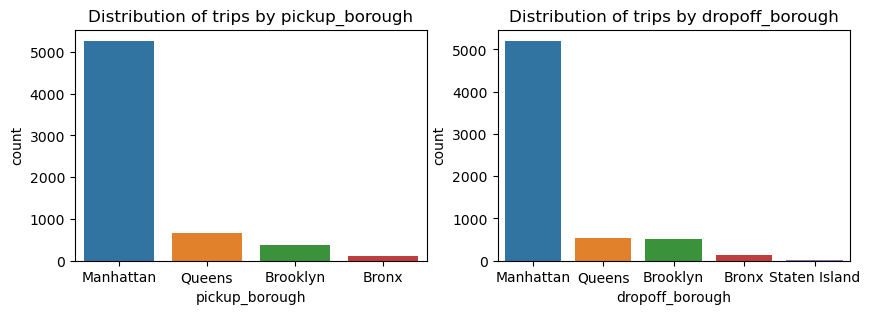

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

sns.countplot(
    data=df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'], 
    x='pickup_borough',
    order= df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']['pickup_borough'].value_counts().index, 
    ax=ax[0]
)
ax[0].set_title('Distribution of trips by pickup_borough')

sns.countplot(
    data=df_taxi_clean[df_taxi_clean['dropoff_borough'] != 'NA'], 
    x='dropoff_borough',
    order= df_taxi_clean[df_taxi_clean['dropoff_borough'] != 'NA']['dropoff_borough'].value_counts().index, 
    ax=ax[1]
);
ax[1].set_title('Distribution of trips by dropoff_borough');

Найбільш популярним районом, з якого починаються поїздки, та районом, в якому закінчуються поїздки, є Manhattan. Інші райони мають значно менші обсяги кількості поїздок порівняно з Manhattan.

15.4. Який спосіб оплати є більш поширеним серед пасажирів?

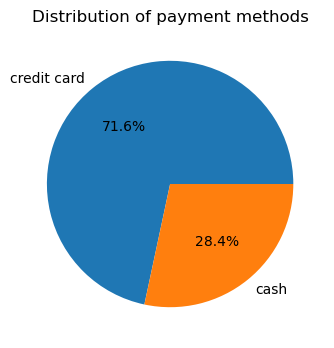

In [34]:
# кількість поїздок для кожного способу оплати
payment_counts = df_taxi_clean['payment'][df_taxi_clean['payment'] != 'NA'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of payment methods')
plt.show()

Більшість пасажирів (71,6%) використовують кредитну карту для оплати поїздок таксі. Це говорить про те, що кредитні карти є популярним і зручним способом оплати серед користувачів таксі. Ця інформація може бути корисною для таксі-служб та водіїв, щоб забезпечити зручні та безпечні опції оплати для своїх пасажирів.

Порівняєм розподіл способів оплати за різними районами.

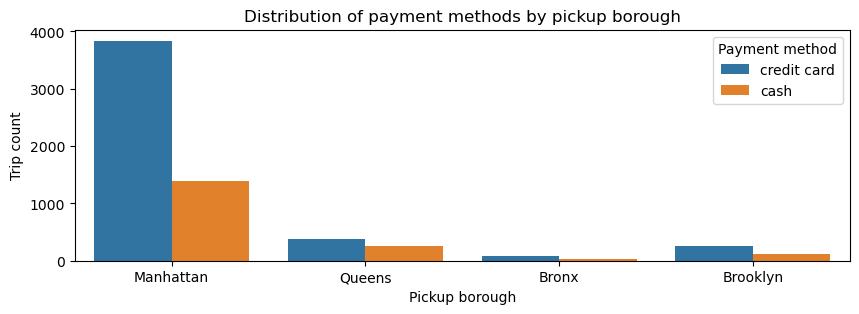

In [35]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df_taxi_clean[(df_taxi_clean['pickup_borough'] != 'NA') & (df_taxi_clean['payment'] != 'NA')], x='pickup_borough', hue='payment')
plt.xlabel('Pickup borough')
plt.ylabel('Trip count')
plt.title('Distribution of payment methods by pickup borough')
plt.legend(title='Payment method');

В усіх районах більшість пасажирів використовують кредитну карту для оплати поїздок таксі. Це свідчить про широке поширення та популярність кредитних карт серед користувачів таксі незалежно від району проживання або роботи. 